<a href="https://colab.research.google.com/github/rupaidutta66/LGMVIP/blob/main/LGM(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**LetsGrowMore**
##Name: ***Subham Dutta***
##Data Science Intern
##TASK 1 Iris Flowers Classification ML Project (BEGINNER LEVEL TASK)
##Task Level: BEGINNER LEVEL TASK

#**Import necessary library**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

#**Loading & Reading the Dataset**


In [57]:
df = pd.read_csv('/content/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
df_sl = df.groupby(by = 'Species')['SepalLengthCm'].mean()
df_sl = df_sl.to_frame()
df_sl
#df_sl.index

,SepalLengthCm
Species,
Iris-setosa,5.006
Iris-versicolor,5.936
Iris-virginica,6.588


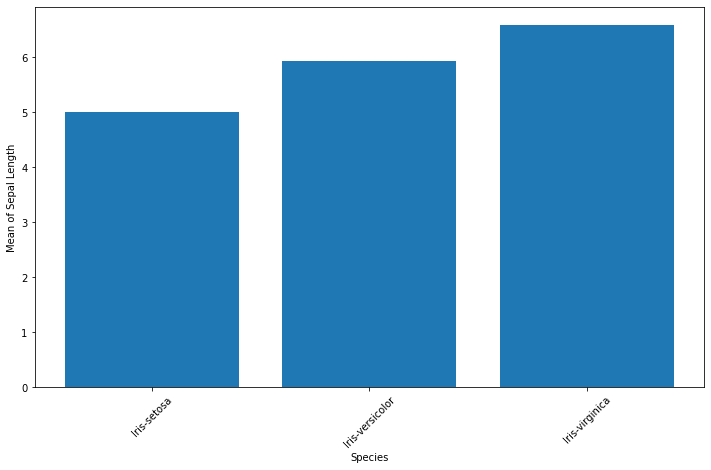

In [59]:

plt.figure(figsize = (12,7))
plt.bar(df_sl.index, df_sl['SepalLengthCm'])
plt.xticks(rotation = 45)
plt.xlabel('Species')
plt.ylabel('Mean of Sepal Length')
plt.show()

In [60]:
df_sw = df.groupby(by = 'Species')['SepalWidthCm'].mean()
df_sw = df_sw.to_frame()
df_sw

,SepalWidthCm
Species,
Iris-setosa,3.418
Iris-versicolor,2.770
Iris-virginica,2.974


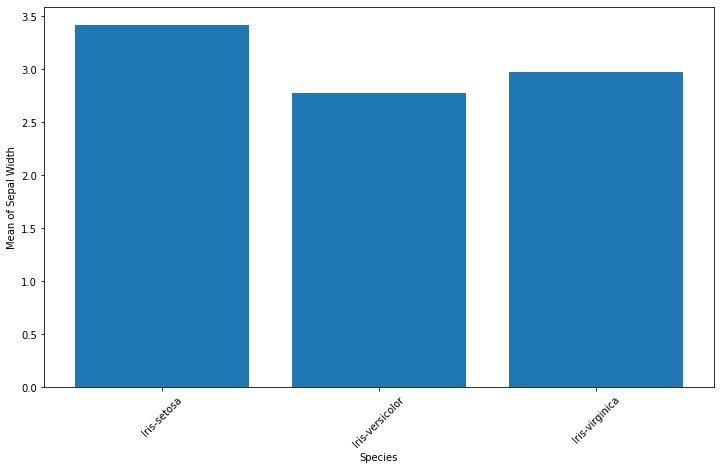

In [37]:
plt.figure(figsize = (12,7))
plt.bar(df_sw.index, df_sw['SepalWidthCm'])
plt.xticks(rotation = 45)
plt.xlabel('Species')
plt.ylabel('Mean of Sepal Width')
plt.show()

In [38]:
df_pl = df.groupby(by = 'Species')['PetalLengthCm'].mean()
df_pl = df_pl.to_frame()
df_pl

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


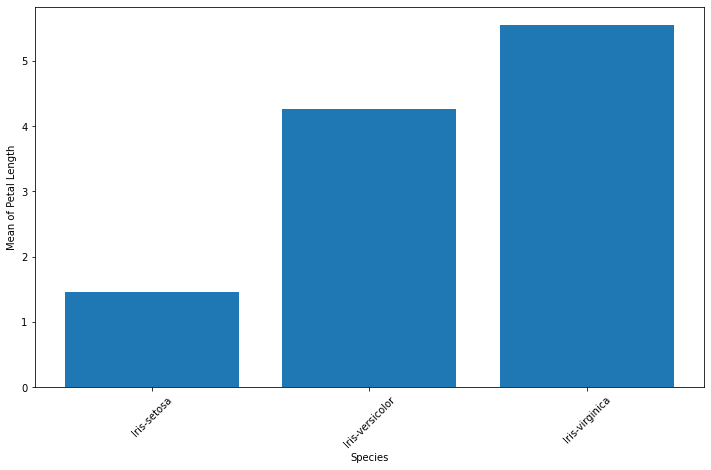

In [39]:
plt.figure(figsize = (12,7))
plt.bar(df_pl.index, df_pl['PetalLengthCm'])
plt.xticks(rotation = 45)
plt.xlabel('Species')
plt.ylabel('Mean of Petal Length')

plt.show()

In [40]:
df_pw = df.groupby(by = 'Species')['PetalWidthCm'].mean()
df_pw = df_pw.to_frame()
df_pw

,PetalWidthCm
Species,
Iris-setosa,0.244
Iris-versicolor,1.326
Iris-virginica,2.026


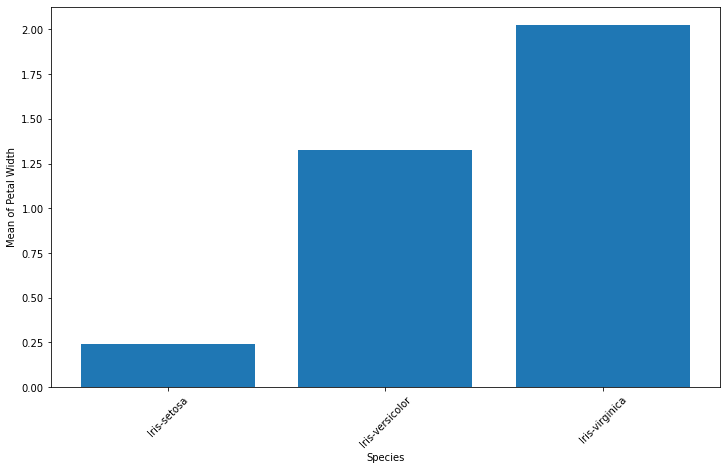

In [41]:
plt.figure(figsize = (12,7))
plt.bar(df_pw.index, df_pw['PetalWidthCm'])
plt.xticks(rotation = 45)
plt.xlabel('Species')
plt.ylabel('Mean of Petal Width')
plt.show()

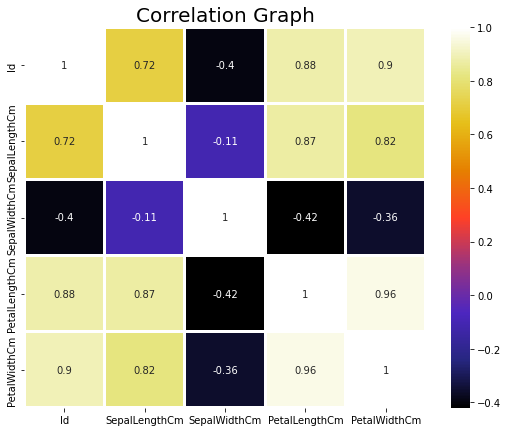

In [42]:
#Correlation Heatmap
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True,linewidths=2)
plt.title("Correlation Graph",size=20)
plt.show()

#**Defining independent and dependent variables**

In [61]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1].values.reshape(-1,1)

In [62]:
scaler = StandardScaler()

In [63]:
df_scaled = scaler.fit_transform(X)

In [64]:
train_X, test_X, train_Y, test_Y = train_test_split(df_scaled, Y, random_state = 1, test_size = 0.2)

#**Model Building**

In [65]:
dtc = DecisionTreeClassifier()

In [48]:
model = dtc.fit(train_X, train_Y)

In [49]:
Y_pred = model.predict(test_X)

#**Ploting Tree**

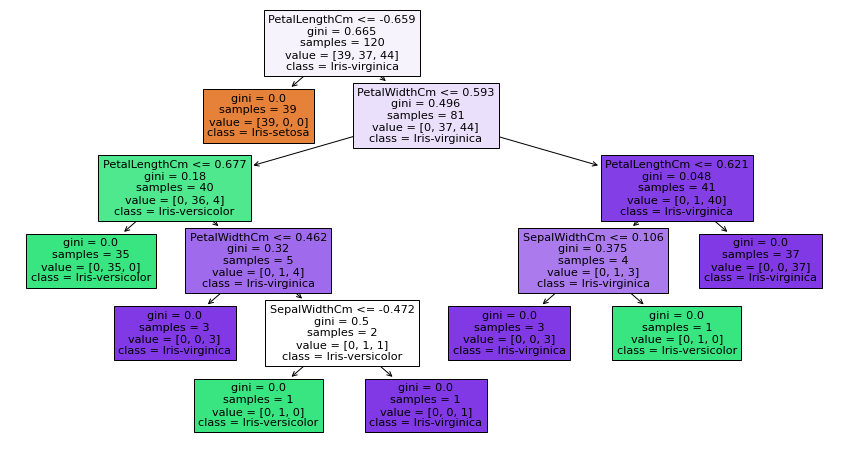

In [50]:
plt.figure(figsize=(15,8))
plot_tree(dtc, feature_names=X.columns,class_names=df.Species.unique(),filled=True)
plt.show()

In [51]:
dtc2 = DecisionTreeClassifier(max_depth=4,max_features=2,min_samples_leaf=3,min_samples_split=3)
dtc2.fit(X=train_X,y=train_Y)

DecisionTreeClassifier(max_depth=4, max_features=2, min_samples_leaf=3,
                       min_samples_split=3)

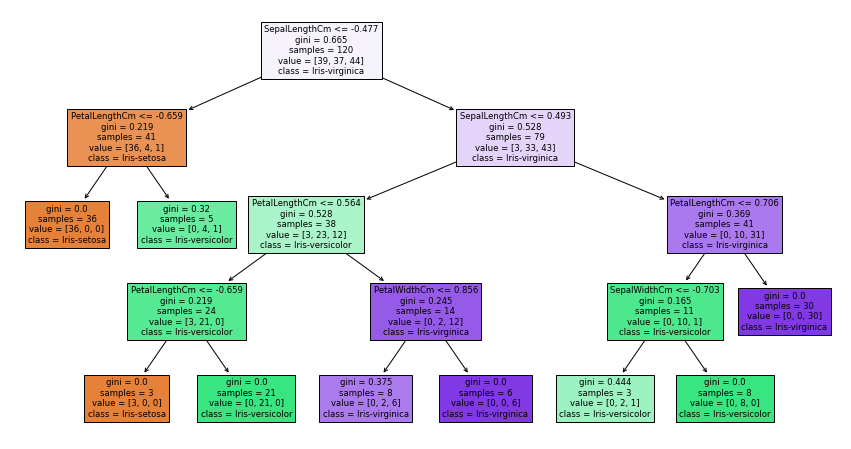

<Figure size 1080x720 with 0 Axes>

In [52]:
plt.figure(figsize=(15,8))
plot_tree(dtc2, feature_names=X.columns,class_names=df.Species.unique(),filled=True)
plt.figure(figsize=(15,10))
plt.show()

#**Testing the Model**

In [53]:
confusion_matrix(test_Y, Y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [54]:
accuracy_score(test_Y, Y_pred)

0.9666666666666667

In [56]:
print(classification_report(test_Y, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

